# TI3145TU Midterm Assignment 
## Football Players Wages

We hope you enjoy this assignment, good luck!

Student names: XXX

Student numbers: XXX

### Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt

### Load data

In [2]:
# These are your training samples along with their labels
data = pd.read_csv('football_wages.csv')
data.head()

# You need to extract the features and the regression target. The regression target is 'log_wages'. 

,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,log_wages
0,27.0,183.0,76.0,b'Korea Republic',57.0,58.0,54.0,30.0,55.0,53.0,...,60.0,67.0,63.0,58.0,9.0,13.0,8.0,11.0,10.0,3.000000
1,21.0,182.0,70.0,b'France',61.0,72.0,58.0,63.0,46.0,62.0,...,47.0,65.0,31.0,33.0,9.0,11.0,9.0,12.0,11.0,3.000000
2,35.0,182.0,75.0,b'Korea Republic',68.0,68.0,62.0,68.0,68.0,70.0,...,61.0,69.0,36.0,40.0,8.0,12.0,7.0,12.0,6.0,3.301030
3,29.0,169.0,70.0,b'Paraguay',67.0,67.0,62.0,55.0,50.0,71.0,...,59.0,84.0,40.0,55.0,6.0,10.0,11.0,15.0,9.0,2.698970
4,30.0,176.0,74.0,b'Austria',65.0,65.0,63.0,49.0,53.0,63.0,...,58.0,75.0,65.0,64.0,12.0,15.0,10.0,8.0,10.0,3.477121


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

def KNReg():
    return KNeighborsRegressor()
def SGDReg():
    return SGDRegressor( random_state=random_state_seed )
def MAE( pred, true ):
    return np.mean( np.abs( pred - true ) )

random_state_seed = 42

number_of_nas = data.isnull().sum().sum()
assert number_of_nas == 0
print("We have no null values so we will not attempt imputing or dropping any values\n")

X = data.drop(columns=['log_wages'])
y = data['log_wages']

#print(f"X: {X.shape}")
#print(f"y: {y.shape}")

baseline_MAE_train = MAE( y, y.mean() )

print( f"If our regressor simply assigned the mean of our data to samples our MAE would be:" )
print( f"Mean Absolute Error: {baseline_MAE_train}" )

We have no null values so we will not attempt imputing or dropping any values

If our regressor simply assigned the mean of our data to samples our MAE would be:
Mean Absolute Error: 0.4914298670113959


/tmp/ipykernel_30040/2441552791.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


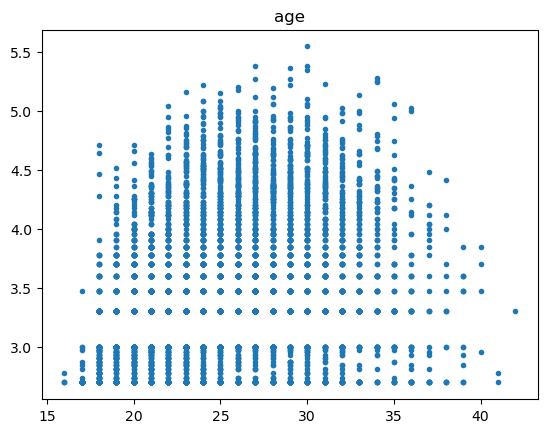

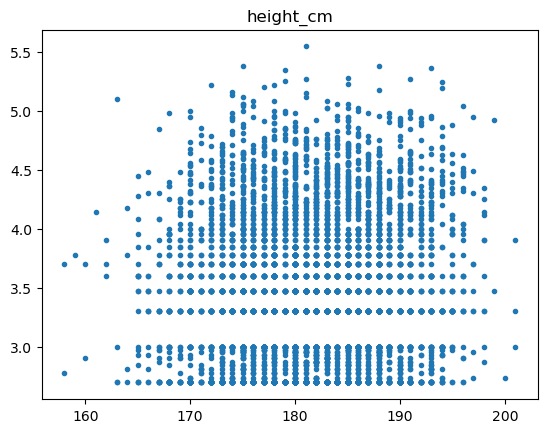

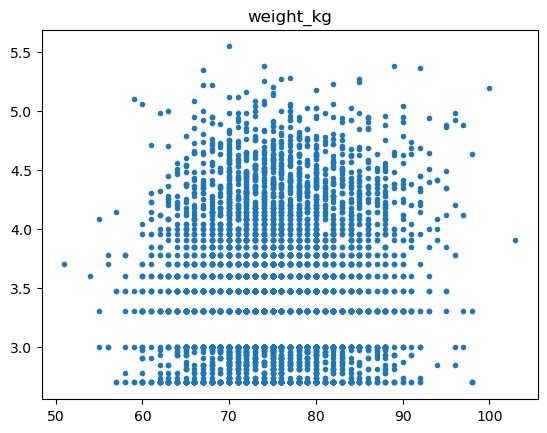

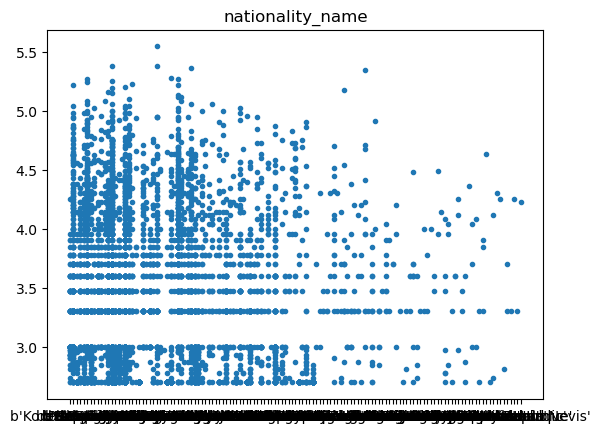

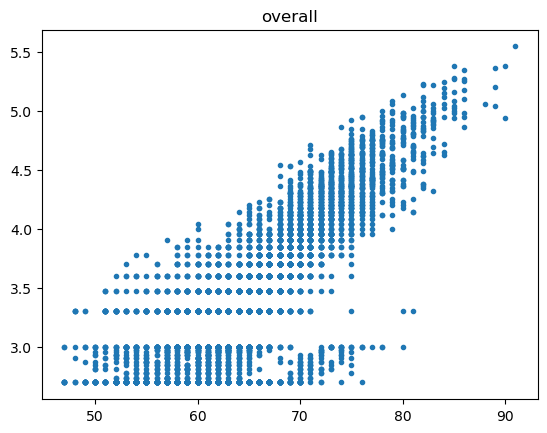

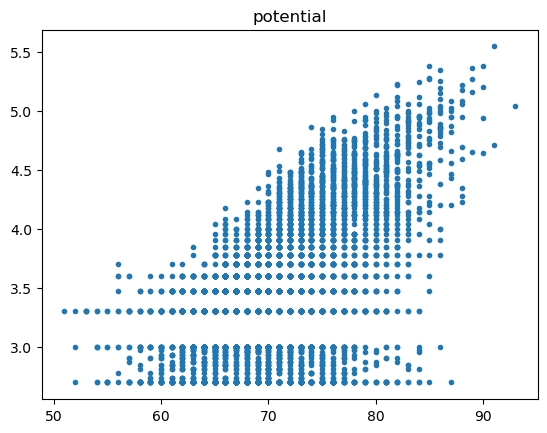

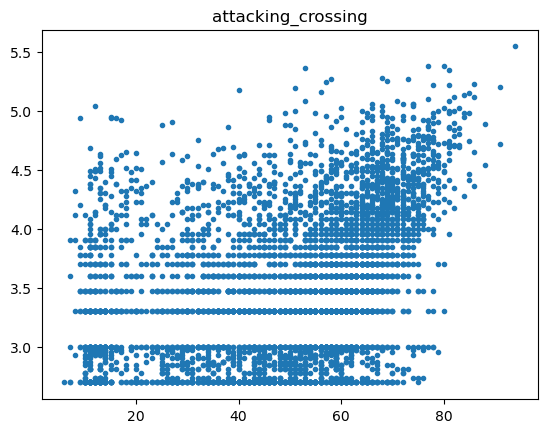

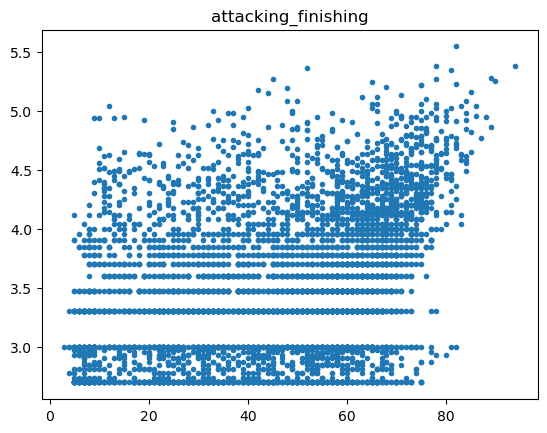

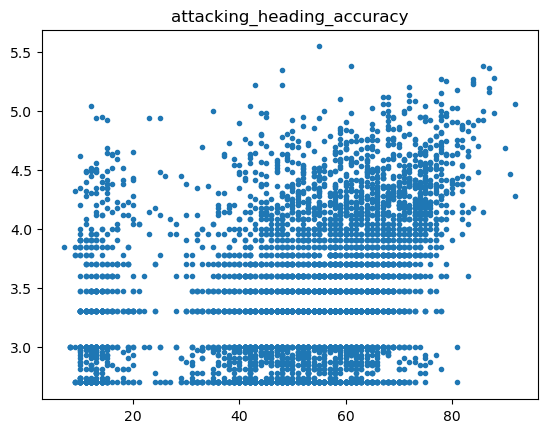

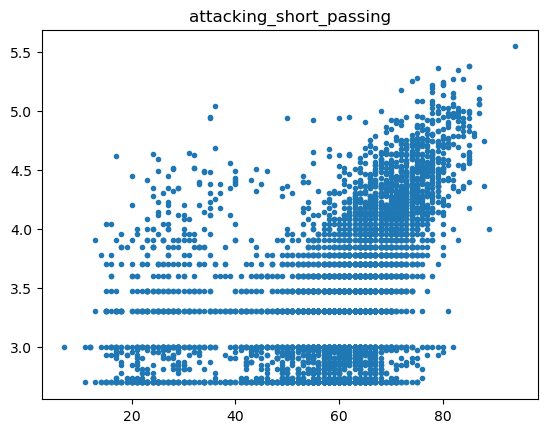

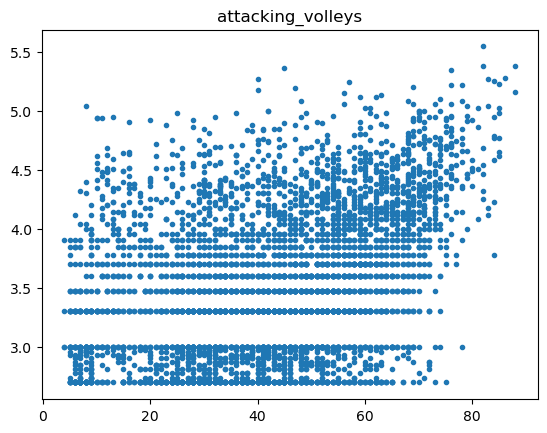

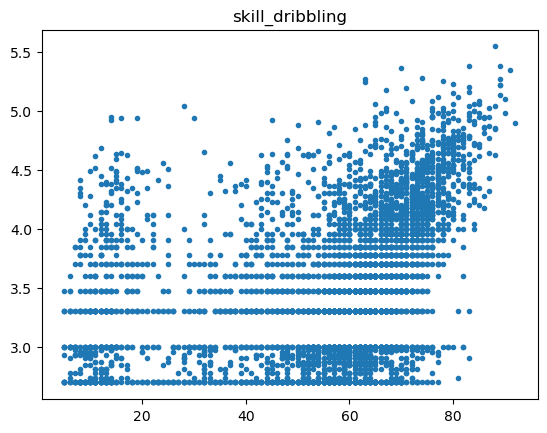

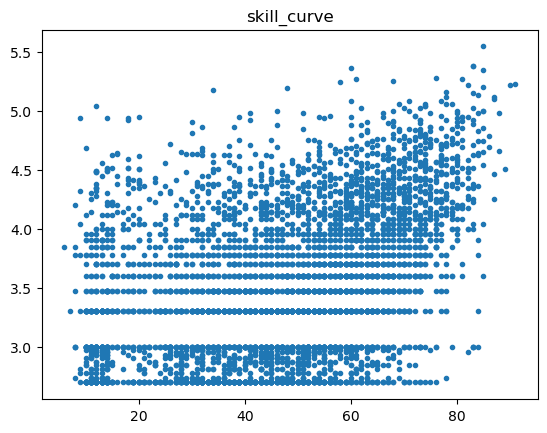

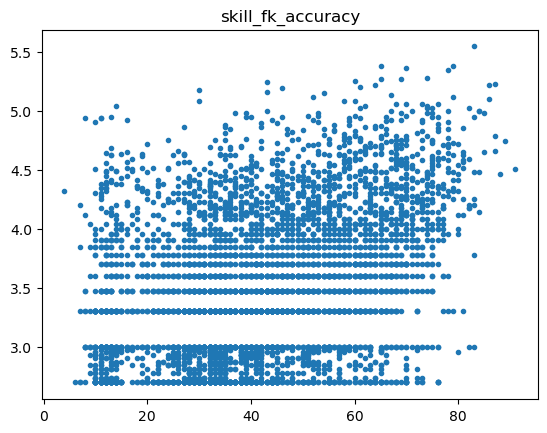

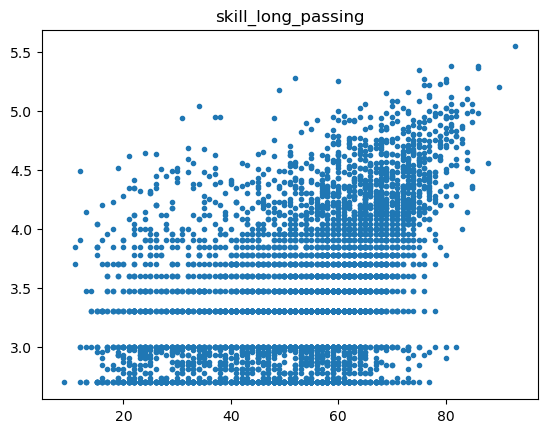

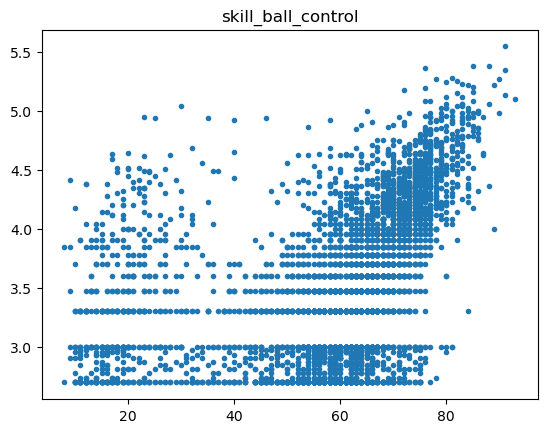

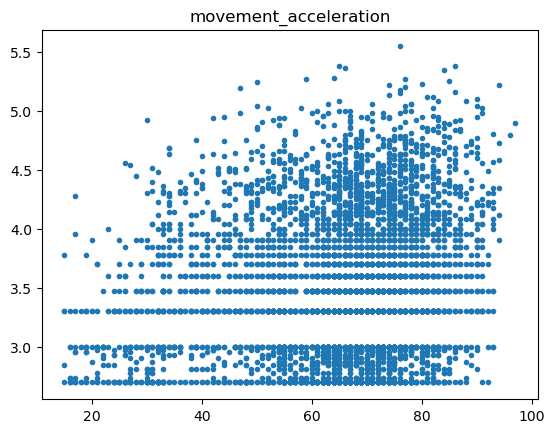

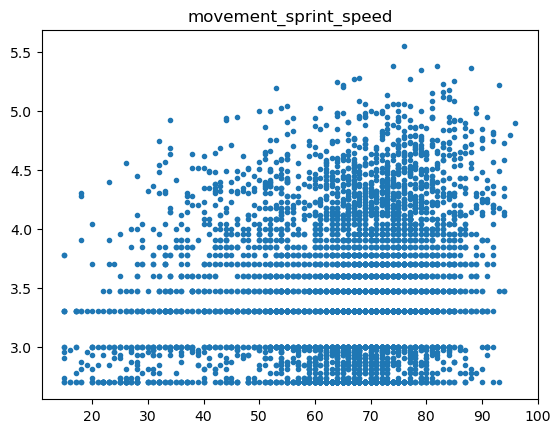

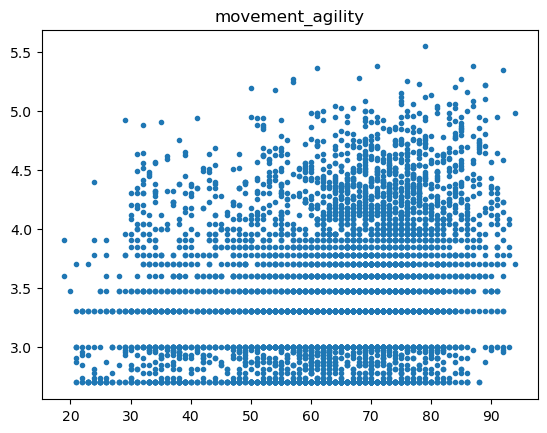

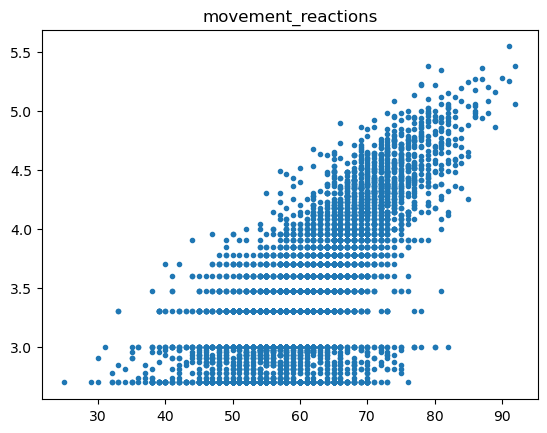

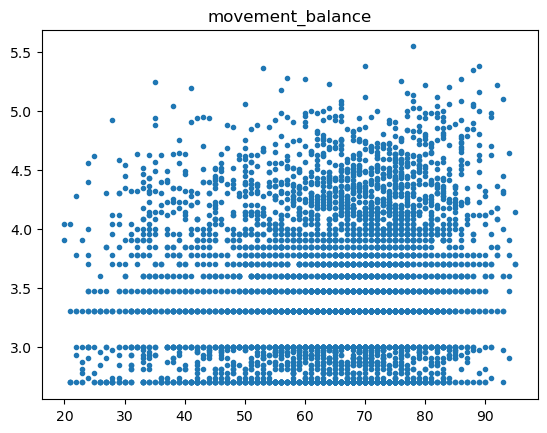

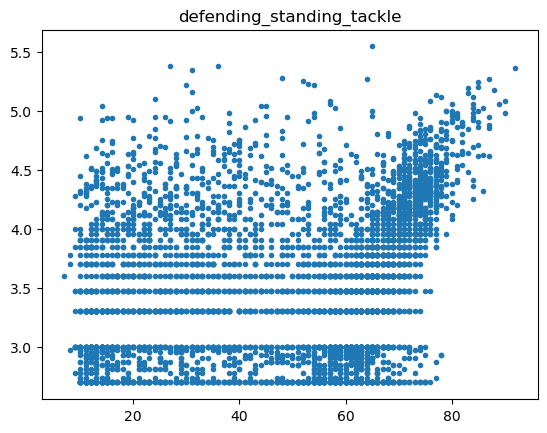

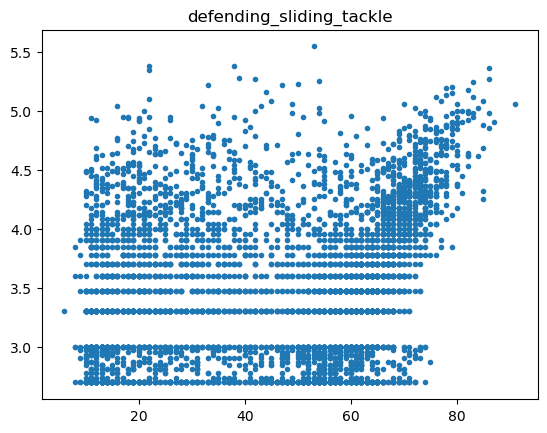

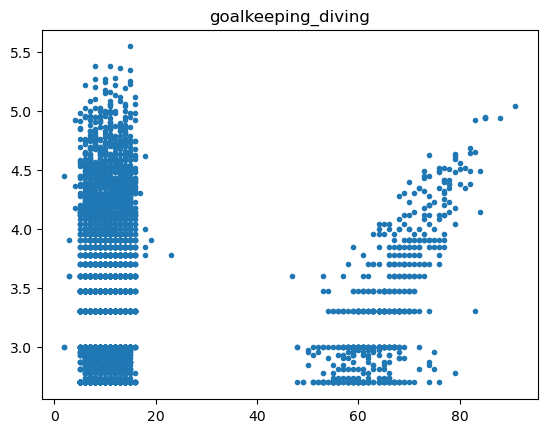

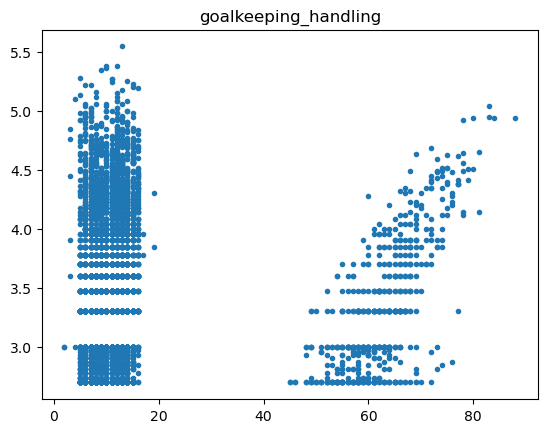

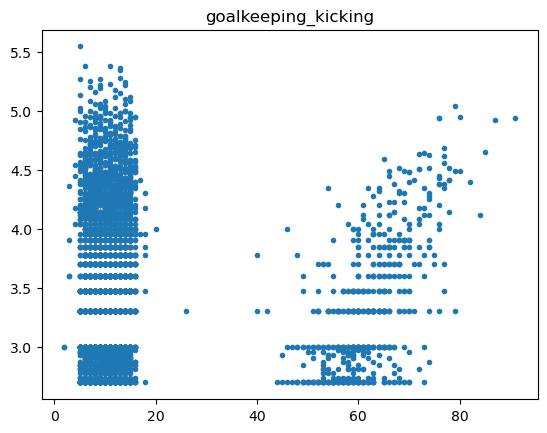

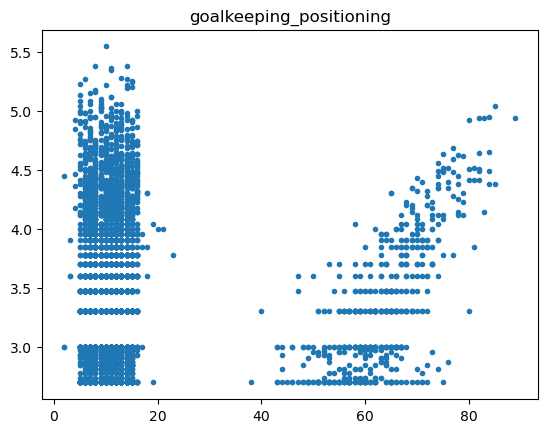

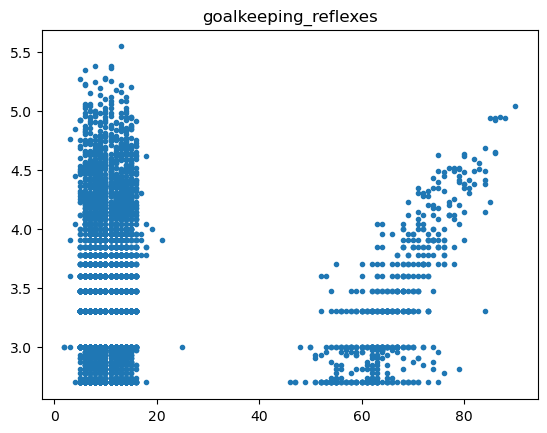

In [4]:
import matplotlib.pyplot as plt
for column in X.columns:
    x = X[column]
    plt.figure()
    plt.title(column)
    scatterplot = plt.scatter(x,y, marker='.')

In [5]:
from bokeh.plotting import figure, gridplot, show
from bokeh.layouts import column
from bokeh.transform import factor_cmap, linear_cmap
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter, BasicTicker, PrintfTickFormatter, axes
from bokeh.models.annotations import Label
from bokeh.io import output_notebook
output_notebook()

def create_color_map():
    from bokeh.colors import RGB

    neg_color = RGB( 0, 0, 255 )
    pos_color = RGB( 255, 0, 0 )

    colors_low = []
    colors_high = []
    for i in range(1,129):
        colors_high.append( RGB( max( pos_color.r, 255 - 2*i ), max( pos_color.g, 255 - 2*i ), max( pos_color.b, 255 - 2*i ) ) )
        colors_low.append( RGB( max( neg_color.r, 255 - 2*i ), max( neg_color.g, 255 - 2*i ), max( neg_color.b, 255 - 2*i ) ) )

    return list(reversed(colors_low)) + colors_high

feature_corr = X.corr(numeric_only=True)
cols = {
        "x_cols": list( feature_corr.columns ),
        "y_cols": list( reversed(feature_corr.columns) )
    }
matrix = pd.DataFrame( feature_corr.stack(), columns=["corr"] ).reset_index()
data = {
    "x": matrix['level_0'].values,
    "y": matrix['level_1'].values,
    "corr": matrix['corr'].values
}
source = ColumnDataSource(data)
fig = figure( title=f"Pearson Correlation",
              x_range=cols['x_cols'], y_range=cols['y_cols'],
              width=700, height=700,
              tools="hover", toolbar_location='above',
              tooltips=[('Column:', "@x"),('Row:', "@y"),('Value:', "@corr")],
              x_axis_location='above'
            )
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_standoff = 0
fig.xaxis.major_label_orientation = 0.8
fig.yaxis.major_label_orientation = 0.8
colors = create_color_map()
mapper = linear_cmap( "corr", colors, low=-1, high=1)
heatmap = fig.rect( x="x", y="y", width=1, height=1, source=source, fill_color=mapper, line_color=None )
fig.add_layout( heatmap.construct_color_bar(
                    ticker=BasicTicker(),
                    border_line_color=None,
                ), 'right'
              )

show(fig)

Loading BokehJS ...

### Pipeline 1

In [6]:
def get_basic_pipeline( data, model ):
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Define the sets of categorical and numerical columns
    categorical_columns = data.select_dtypes(include=["object", "category"])

    # for categorical values use one hot encoding
    # handle_unknown => if the encoder sees a new category during transformation, leave 0 for all values for that item

    def test_print(X):
        print(X.shape)
        return X
    print_transformer = FunctionTransformer( test_print )
    
    preprocess = ColumnTransformer([
            ("cat_pipeline", one_hot_encoder, categorical_columns.columns)
        ],
        remainder="passthrough")

    return Pipeline([("preprocess", preprocess), ("model", model)])

### Pipeline 2

In [7]:
def get_preprocessed_pipeline( data, model ):
    one_hot_encoder = OneHotEncoder( handle_unknown="ignore", sparse_output=False )
    scaler = StandardScaler()
    pca = PCA( svd_solver="full", n_components=0.99, random_state=random_state_seed )
    
    def bmi( df ):
        df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2 )
        df = df.drop(columns=["weight_kg","height_cm"])
        return df
    bmi_transformer = FunctionTransformer( bmi )

    def test_print(X):
        print(X.shape)
        return X
    print_transformer = FunctionTransformer( test_print )
    
    categorical_columns = data.select_dtypes(include=["object", "category"])
    numerical_columns = data.select_dtypes(exclude=["object", "category"])
    
    preprocessor = ColumnTransformer( transformers = [
            ( "categorical", one_hot_encoder, categorical_columns.columns ),
            ( "numerical", scaler, numerical_columns.columns ),
            ( "bmi", bmi_transformer, ["height_cm","weight_kg"] ),
        ],
        remainder="passthrough" )
    pipeline = Pipeline(steps=[( "preprocessing", preprocessor ), ( "pca", pca ), ( "training", model )])
    return pipeline

### Pipeline Testing

In [8]:
def train_model_pipeline( pipeline_fun, model, X, y ):
    pipeline = pipeline_fun( X, model )
    pipeline.fit( X, y )
    y_pred = pipeline.predict( X )
    return pipeline, MAE( y_pred, y )

def evaluate_pipeline( pipeline, X, y ):
    y_pred = pipeline.predict( X )
    return MAE( y_pred, y )

SGD_pipeline_basic, SGD_MAE_train_basic = train_model_pipeline( pipeline_fun=get_basic_pipeline, model=SGDReg(), X=X, y=y )
KN_pipeline_basic, KN_MAE_train_basic = train_model_pipeline( pipeline_fun=get_basic_pipeline, model=KNReg(), X=X, y=y )

print( f"Our basic pipeline with an SGD regressor has a MAE of:" )
print( f"Mean Absolute Error: {SGD_MAE_train_basic:.6f}\n" )

print( f"Our Basic pipeline with an KNeighbors regressor has a MAE of:" )
print( f"Mean Absolute Error: {KN_MAE_train_basic:.6f}\n" )

SGD_pipeline, SGD_MAE_train = train_model_pipeline( pipeline_fun=get_preprocessed_pipeline, model=SGDReg(), X=X, y=y )
KN_pipeline, KN_MAE_train = train_model_pipeline( pipeline_fun=get_preprocessed_pipeline, model=KNReg(), X=X, y=y )

print( f"Our extra pipeline with an SGD regressor has a MAE of:" )
print( f"Mean Absolute Error: {SGD_MAE_train:.6f}\n" )

print( f"Our extra pipeline with an KNeighbors regressor has a MAE of:" )
print( f"Mean Absolute Error: {KN_MAE_train:.6f}\n" )

Our basic pipeline with an SGD regressor has a MAE of:
Mean Absolute Error: 19940807053000.832031

Our Basic pipeline with an KNeighbors regressor has a MAE of:
Mean Absolute Error: 0.239659

Our extra pipeline with an SGD regressor has a MAE of:
Mean Absolute Error: 0.254329

Our extra pipeline with an KNeighbors regressor has a MAE of:
Mean Absolute Error: 0.228339



### GridSearch

In [9]:
from sklearn.model_selection import GridSearchCV

In [18]:
def SGD_Gridsearch( pipeline_fun, X_train, y_train):
    import warnings
    warnings.filterwarnings('ignore')
    
    #losses = [ 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive' ]
    #penalties = [ 'l2', 'l1', 'elasticnet', None ]
    #alphas = [ j*10**(i-10) for i in range(15) for j in range(1,10) ]
    #l1_ratios = [ 0.1*i for i in range(11) ] # Only for elasticnet
    # Fit intercept not tested for as we do standard scaling to remove the mean
    # max_iter left standard, no sense in increasing epochs as the model can only converge more
    # tol, much like max_iter this has no effect on model performance. It only stops training when some cut-off is reach which could be destructcive in grid_search
    #shuffle = True # Shuffling should only make our model more robust
    # verbosity unrelated to model
    #epsilons = [ j*10**(i-4) for i in range(5) for j in range(1,10)  ] # Given squared loss and our MAE observations the loss should be in the order of 10^-k for some positive k. Our prediction is that 0<k<4
    #random_state = random_state_seed # For reproducability
    #learning_rates = [ 'optimal', 'invscaling', 'adaptive' ] constant removed because adaptive is equivalent to it when it performs well and better when constant performs worse
    #eta0s = [ j*10**(i-6) for i in range(7) for j in range(1,10) ]
    # We leave power_t as the default since we do not know what values would be more appropriate and cannot search (-inf,inf) in a reasonable time
    # early_stopping = False by default
    # validation_fraction is not necessary to be set without early_stopping
    # n_iter_no_change again unnecessary without early_stopping
    #warm_start=False # While it is false by default we set it again as we definitively do not want this since it would be detrimental to the grid search
    # average left false as is by default

    params = {
        "loss": [ 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive' ], # 4
        "penalty": [ 'l2', 'l1', 'elasticnet', None ], # 4
        "alpha": [ 10**(i-5) for i in range(3) ], # 3
        "l1_ratio": [ 0.1*i for i in range(3,8) ], # 5
        "epsilon": [ 10**(i-3) for i in range(3) ], # 3
        "learning_rate": [ 'optimal', 'invscaling', 'adaptive' ], # 3
        "eta0": [ 10**(i-3) for i in range(3) ], # 4
        "shuffle": [ True ],
        "random_state": [ random_state_seed ],
        "warm_start": [ False ]
    }
    model = GridSearchCV( SGDRegressor(), params, cv = 2, scoring='neg_mean_absolute_error', verbose=1 )
    _, mean_absolute_error = train_model_pipeline( pipeline_fun, model, X_train, y_train )
    return mean_absolute_error, model

GS_SGD_MAE, model = SGD_Gridsearch( pipeline_fun=get_preprocessed_pipeline, X_train=X, y_train=y )
print("MAE: ", GS_SGD_MAE)
print("Optimal params: ", model.best_params_)     
    

Fitting 2 folds for each of 6480 candidates, totalling 12960 fits
MAE:  0.24591134732791625
Optimal params:  {'alpha': 0.0001, 'epsilon': 0.01, 'eta0': 0.01, 'l1_ratio': 0.7000000000000001, 'learning_rate': 'adaptive', 'loss': 'epsilon_insensitive', 'penalty': 'elasticnet', 'random_state': 42, 'shuffle': True, 'warm_start': False}


In [21]:
def KN_Gridsearch(X_train, y_train):
    import warnings
    warnings.filterwarnings('ignore')
    
    # n_neighbors: number of neighbors to consider
    # p: power parameter for the Minkowski metric

    params = {
        "n_neighbors": [i for i in range(1, 30)],
        "weights": [ 'uniform', 'distance' ],
        # Algortihm 
        # Leaf size 
        "p": [1,2]
    }
    model = GridSearchCV( KNeighborsRegressor(), params, cv = 5, scoring='neg_mean_absolute_error' )

    _, mean_absolute_error = train_model_pipeline( get_preprocessed_pipeline, model, X_train, y_train )
    return mean_absolute_error, model

mean_absolute_error_kn, model = KN_Gridsearch(X, y)
print("MAE: ", mean_absolute_error_kn)
print("Optimal params: ", model.best_params_) 
print("Best score: ", model.best_score_)   

MAE:  7.690050407758165e-08
Optimal params:  {'n_neighbors': 18, 'p': 2, 'weights': 'distance'}
Best score:  -0.2719640669228077


### Autograder 

In the autograder you will need to provide two things: 1) estimate of the MAE of your model on unseen data, 2) the predictions on the autograder data. For the autograder data we only provide the features and not the regression targets. Thus, you cannot compute the MAE on this data yourself - you need to estimate that with the data provided above. 

In [ ]:
data_autograder = pd.read_csv('football_autograde.csv')
data_autograder.shape


In [ ]:
# TODO Replace this with your own estimate of the MAE of your best model
estimate_MAE_on_new_data = np.array([SGD_MAE_train])

# TODO Replace this with the predictions of your best model
# via e.g. prediction = model.predict(data_autograder)
# your predictions here should again be the $log_{10}(wage)$ of the football player, just as in the provided data. 
predictions_autograder_data = SGD_pipeline.predict( data_autograder )

# Upload this file to the Vocareum autograder:
result = np.append(estimate_MAE_on_new_data, predictions_autograder_data)
pd.DataFrame(result).to_csv("autograder_submission.txt", index=False, header=False)